
<h1><strong>Trabajo Práctico Integrador </strong></h1>
<h2>Dataset: Stellar Classification Dataset - SDSS17</h2>

<h3>Contexto</h3>

<p>
En astronomía, la clasificación estelar es la clasificación de las estrellas en función de sus características espectrales. El esquema de clasificación de galaxias, quásares y estrellas es uno de los más fundamentales en astronomía. La catalogación temprana de las estrellas y su distribución en el cielo ha llevado a comprender que forman nuestra propia galaxia y, tras la distinción de que Andrómeda era una galaxia separada de la nuestra, se comenzaron a estudiar numerosas galaxias a medida que se construían telescopios más potentes. Este datasat tiene como objetivo clasificar estrellas, galaxias y quásares en función de sus características espectrales.
</p>

<p>
Contenido
Los datos constan de 100.000 observaciones del espacio realizadas por el SDSS (Sloan Digital Sky Survey). Cada observación se describe mediante 17 columnas de características y 1 columna de clase que la identifica como estrella, galaxia o quásar.
</p>

1. obj_ID = Identificador de objeto, el valor único que identifica el objeto en el catálogo de imágenes utilizado por CAS
2. alpha = ángulo de Ascensión Recta (en la época J2000)
3. delta = ángulo de declinación (en la época J2000)
4. u = Filtro ultravioleta en el sistema fotométrico
5. g = Filtro verde en el sistema fotométrico
6. r = Filtro rojo en el sistema fotométrico
7. i = Filtro de infrarrojo cercano en el sistema fotométrico
8. z = Filtro de infrarrojos en el sistema fotométrico
9. run_ID = Número de ejecución utilizado para identificar el análisis específico
10. rereun_ID = Número de repetición para especificar cómo se procesó la imagen
11. cam_col = Columna de cámara para identificar la línea de exploración dentro de la ejecución
12. field_ID = Número de campo para identificar cada campo
13. spec_obj_ID = ID único utilizado para objetos espectroscópicos ópticos (esto significa que 2 observaciones diferentes con el mismo spec_obj_ID deben compartir la clase de salida)
14. class = clase de objeto (galaxia, estrella u objeto cuásar)
15. redshift = valor de corrimiento al rojo basado en el aumento de la longitud de onda
16. plate = ID de placa, identifica cada placa en SDSS
17. MJD = Fecha juliana modificada, utilizada para indicar cuándo se tomó un determinado dato del SDSS
18. fiber_ID = ID de fibra que identifica la fibra que apuntó la luz al plano focal en cada observación



<h3>Tabla de Contenidos</h3>
<a id="indice"></a>
<div>
    <ul>
        <li>
            <span>
                <a href="#importacion">
                    <span>1&nbsp;&nbsp;</span>
                    <strong>Importación de librerías</strong>
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#carga"><span>2&nbsp;&nbsp;</span>
                    <strong>Carga de datos</strong>
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#eda">
                    <span>3&nbsp;&nbsp;</span>
                    <strong>Análisis Exploratorio de Datos (EDA)</strong>
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#preprocesado">
                    <span>4&nbsp;&nbsp;</span>
                    <strong>Preprocesado de datos</strong>
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#pycaret">
                    <span>5&nbsp;&nbsp;</span>
                    <strong>Probemos autoML con pycaret</strong>
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#dt">
                    <span>6&nbsp;&nbsp;</span>
                    <strong>Primer modelo: Decision Tree</strong>
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#knn">
                    <span>7&nbsp;&nbsp;</span>
                    <strong>Segundo modelo: KNN (K Neighbors Classifier)</strong>
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#rf">
                    <span>8&nbsp;&nbsp;</span>
                    <strong>Tercer modelo: Random Forest</strong>
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#qda">
                    <span>9&nbsp;&nbsp;</span>
                    <strong>Cuarto modelo: QDA (Quadratic Discriminant Analysis)</strong>
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#lda">
                    <span>10&nbsp;&nbsp;</span>
                    <strong>Quinto modelo: LDA (Linear Discriminant Analysis)</strong>
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#lr">
                    <span>11&nbsp;&nbsp;</span>
                    <strong>Sexto modelo: LR (Logistic Regression)</strong>
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#conclusion">
                    <span>12&nbsp;&nbsp;</span>
                    <strong>Conclusión</strong>
                </a>
            </span>
        </li>
    </ul>
</div>

<a id="importacion"></a>
## 1. Importación de librerías

<a href="#indice"><span></span><strong>Volver al Índice</strong></a>

In [83]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

<a id="carga"></a>
## 2. Carga de datos

<a href="#indice"><span></span><strong>Volver al Índice</strong></a>

In [84]:
# Cargamos el dataset
df = pd.read_csv('data/star_classification.csv')

In [85]:
# Veamos las primeras 5 filas
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [87]:
df.shape

(100000, 18)

In [88]:
df.columns

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')

In [89]:
len(df.columns)


18

['obj_ID',
 'alpha',
 'delta',
 'u',
 'g',
 'r',
 'i',
 'z',
 'run_ID',
 'cam_col',
 'field_ID',
 'spec_obj_ID',
 'redshift',
 'plate',
 'MJD',
 'fiber_ID']

<a id="eda"></a>
## 3. Análisis exploratorio de datos(EDA)

<a href="#indice"><span></span><strong>Volver al Índice</strong></a>



Veamos la información estadística del dataset

In [96]:
df.describe().T # Transpongo para que se vea mejor

,count,mean,std,min,25%,50%,75%,max
obj_ID,100000.0,1.237665e+18,8.438560e+12,1.237646e+18,1.237659e+18,1.237663e+18,1.237668e+18,1.237681e+18
alpha,100000.0,1.776291e+02,9.650224e+01,5.527828e-03,1.275182e+02,1.809007e+02,2.338950e+02,3.599998e+02
delta,100000.0,2.413530e+01,1.964467e+01,-1.878533e+01,5.146771e+00,2.364592e+01,3.990155e+01,8.300052e+01
u,100000.0,2.198047e+01,3.176929e+01,-9.999000e+03,2.035235e+01,2.217914e+01,2.368744e+01,3.278139e+01
g,100000.0,2.053139e+01,3.175029e+01,-9.999000e+03,1.896523e+01,2.109983e+01,2.212377e+01,3.160224e+01
r,100000.0,1.964576e+01,1.854760e+00,9.822070e+00,1.813583e+01,2.012529e+01,2.104478e+01,2.957186e+01
i,100000.0,1.908485e+01,1.757895e+00,9.469903e+00,1.773228e+01,1.940514e+01,2.039650e+01,3.214147e+01
z,100000.0,1.866881e+01,3.172815e+01,-9.999000e+03,1.746068e+01,1.900460e+01,1.992112e+01,2.938374e+01
run_ID,100000.0,4.481366e+03,1.964765e+03,1.090000e+02,3.187000e+03,4.188000e+03,5.326000e+03,8.162000e+03
rerun_ID,100000.0,3.010000e+02,0.000000e+00,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02


Veamos los valores unicos de las columnas

In [90]:
# Recorro las columnas y muestro los valores unicos
for col in df.columns:
    print("Nombre Columna: ",col," valores únicos: ", len(df[col].unique()))

Nombre Columna:  obj_ID  valores únicos:  78053
Nombre Columna:  alpha  valores únicos:  99999
Nombre Columna:  delta  valores únicos:  99999
Nombre Columna:  u  valores únicos:  93748
Nombre Columna:  g  valores únicos:  92651
Nombre Columna:  r  valores únicos:  91901
Nombre Columna:  i  valores únicos:  92019
Nombre Columna:  z  valores únicos:  92007
Nombre Columna:  run_ID  valores únicos:  430
Nombre Columna:  rerun_ID  valores únicos:  1
Nombre Columna:  cam_col  valores únicos:  6
Nombre Columna:  field_ID  valores únicos:  856
Nombre Columna:  spec_obj_ID  valores únicos:  100000
Nombre Columna:  class  valores únicos:  3
Nombre Columna:  redshift  valores únicos:  99295
Nombre Columna:  plate  valores únicos:  6284
Nombre Columna:  MJD  valores únicos:  2180
Nombre Columna:  fiber_ID  valores únicos:  1000


In [91]:
# Veo los valores únicos de la columna 'cam_col'
df['cam_col'].unique()

array([2, 5, 3, 4, 6, 1])

In [92]:
# Los ordeno
np.sort(df['cam_col'].unique())

array([1, 2, 3, 4, 5, 6])

In [93]:
# Veo los valores únicos de la columna 'class'
df['class'].unique()

array(['GALAXY', 'QSO', 'STAR'], dtype=object)

cam_col posee 6 valores únicos.
class posee 3 valores unicos

Veamos cuales son.

Veamos la columna '``class``'

In [94]:
df['class'].value_counts()

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

Visualizamos los datos

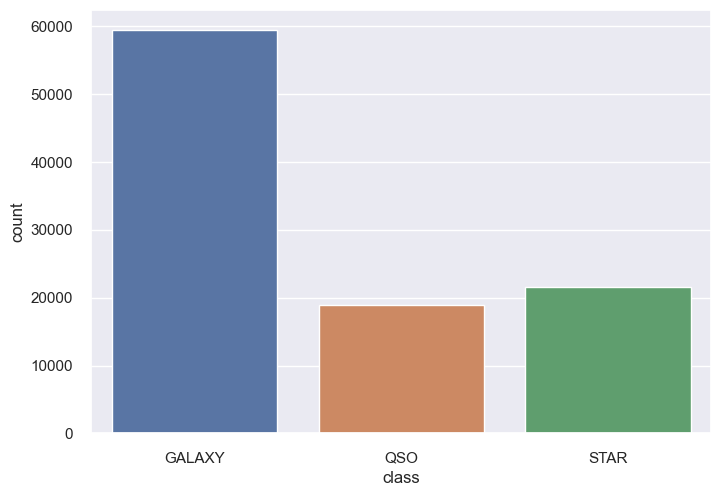

In [95]:
# Grafiquemos la distribución de las clases
sns.countplot(x='class', data=df)

plt.show()

Graficamos la distribucion de las columnas numericas

In [32]:
# Grafico las columnas para ver si siguen una distribución normal, en un grafico de 6x3

import matplotlib.pyplot as plt
import seaborn as sns

class Graficos:
    def plot_numerical_distributions(self, df, NUMERICAL_FEATURES):
        """
        Grafica las distribuciones de las características numéricas del DataFrame dado.

        :param df: DataFrame de Pandas que contiene los datos.
        :param NUMERICAL_FEATURES: Lista de nombres de columnas numéricas en el DataFrame.
        """
        # Crea una figura con una matriz de subgráficos de 6x3
        fig, axes = plt.subplots(7, 3, figsize=(12, 18))
        fig.subplots_adjust(hspace=0.5)  # Espacio vertical entre subgráficos

        # Define una paleta de colores única para cada característica numérica
        colors = sns.color_palette('deep', n_colors=len(NUMERICAL_FEATURES))

        # Itera a través de las características numéricas y dibuja los histogramas con colores diferentes
        for i, (column, color) in enumerate(zip(NUMERICAL_FEATURES, colors)):
            row, col = divmod(i, 3)  # Calcula la fila y la columna actual
            ax = axes[row, col]  # Obtiene el subgráfico actual
            sns.histplot(df[column], ax=ax, kde=True, color=color)  # Dibuja el histograma con color y curva de la distribución

            # Agrega un título al subgráfico
            ax.set_title(f'Distribución de {column}')

        # Añade un título a la figura
        fig.suptitle('Histogramas y Curvas de Distribución de características numéricas', fontsize=16)

        # Ajusta automáticamente los espacios entre los subgráficos y muestra la figura
        plt.tight_layout()
        plt.show()


In [33]:
graficos = Graficos()

In [34]:
# Grafico las columnas para ver si siguen una distribución normal, en un grafico de 6x3
# Se puede comentarizar esta linea si no se quiere graficar

#graficos.plot_numerical_distributions(df_label_encoder, NUMERICAL_FEATURES)

### Veamos la correlación

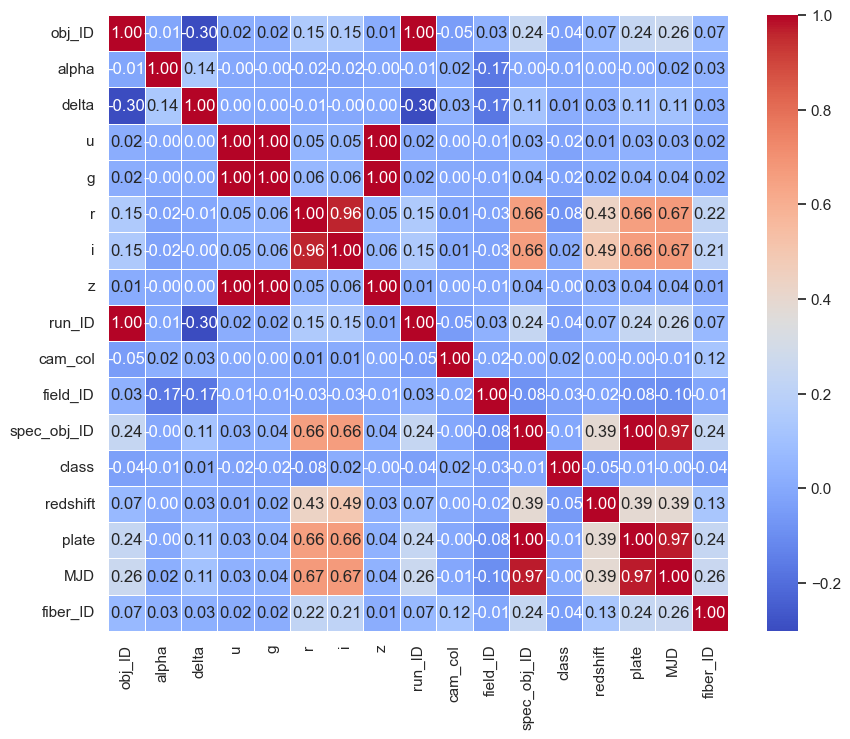

In [35]:
# Tabla de correlacion completa
# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 8))

# Crear el heatmap
sns.heatmap(df_label_encoder.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

# Mostrar el gráfico
plt.show()


In [36]:
# Imprimo los valores de mayor a menor de correlación con la variable objetivo
#df.corr()['class'].sort_values(ascending=False)

# Imprimo los valores de mayor a menor de correlación con la variable objetivo pero el valor absoluto
df_label_encoder.corr()['class'].abs().sort_values(ascending=False)

class          1.000000
r              0.076766
redshift       0.054239
fiber_ID       0.041586
run_ID         0.036014
obj_ID         0.036012
field_ID       0.034833
u              0.024645
cam_col        0.023138
g              0.020066
i              0.015028
delta          0.014452
alpha          0.011756
spec_obj_ID    0.010060
plate          0.010060
z              0.001614
MJD            0.000405
Name: class, dtype: float64

Veamos la distribucion de las principales variables en funcion a la clase

In [37]:
# Grafico de pairplot
#sns.pairplot(df, hue='class')
# pair_plot = sns.pairplot(df, hue="class", diag_kind="hist", corner=True)# Tarda como 20 minutos en correr
#pair_plot = sns.pairplot(df.sample(2000), hue="class", diag_kind="hist", corner=True) 

# Guarda el gráfico en un archivo (por ejemplo, en formato PNG)
#pair_plot.savefig('pair_plot.png')
#plt.show()


<a id="preprocesado"></a>

## 4. Preprocesado de datos

<a href="#indice"><span></span><strong>Volver al Índice</strong></a>



### Codificación de variables categoricas.

Como vimos class y cam_col son categóricas

- Vamos a usa label encoder con class 
- Vamos a usar Hot encoding con cam_col

Para la feature '``class``' reemplazaremos por los siguientes valores:

- 0 = GALAXY
- 1 = OSO
- 2 = STAR

Para la feature '``cam_col``' reemplazaremos por los siguientes valores:

- 0 = 1
- 1 = 2
- 2 = 3
- 3 = 4
- 4 = 5
- 5 = 6

In [97]:
# hago una copia del dataset
df_label_encoder = df.copy()

In [98]:
from sklearn.preprocessing import LabelEncoder # Codificar variables categóricas

# convertimos la columna 'class' a valores numéricos

# Definir una función lambda para mapear los valores a números
le = LabelEncoder()

df_label_encoder['class']=le.fit_transform(df_label_encoder['class'])

# convertimos la columna 'cam_col' a valores numéricos
df_label_encoder['cam_col']=le.fit_transform(df_label_encoder['cam_col'])

In [99]:
# Verificamos los valores únicos de la columna 'class'
df_label_encoder['class'].unique() 

array([0, 1, 2])

In [100]:
# Verificamos los valores únicos de la columna 'cam_col'
df_label_encoder['cam_col'].unique()

array([1, 4, 2, 3, 5, 0])

In [101]:
df_label_encoder.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,1,79,6.543777e+18,0,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,4,119,1.176014e+19,0,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,1,120,5.152200e+18,0,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,2,214,1.030107e+19,0,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,2,137,6.891865e+18,0,0.116123,6121,56187,842


In [102]:
df_label_encoder.columns

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')

Separamos las variables númericas y la feature objetivo

In [103]:
NUMERICAL_FEATURES = ['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'redshift',
       'plate', 'MJD', 'fiber_ID']

In [104]:
LABEL = 'class'

In [105]:
# veamos si hay valores nulos
df_label_encoder.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [106]:
# La columna rerun_ID tiene un solo valor, por lo que no aporta información
NUMERICAL_FEATURES.remove('rerun_ID') 

# Elimino la columna rerun_ID
df_label_encoder.drop(columns=['rerun_ID'], inplace=True)

In [107]:
NUMERICAL_FEATURES

['obj_ID',
 'alpha',
 'delta',
 'u',
 'g',
 'r',
 'i',
 'z',
 'run_ID',
 'cam_col',
 'field_ID',
 'spec_obj_ID',
 'redshift',
 'plate',
 'MJD',
 'fiber_ID']

<a id="pycaret"></a>

## 5. Probemos autoML con pycaret

<a href="#indice"><span></span><strong>Volver al Índice</strong></a>




In [108]:
df_label_encoder.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,1,79,6.543777e+18,0,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,4,119,1.176014e+19,0,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,1,120,5.152200e+18,0,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,2,214,1.030107e+19,0,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,2,137,6.891865e+18,0,0.116123,6121,56187,842


In [109]:
from pycaret.classification import * # Importo todas las funciones de clasificación de PyCaret

In [110]:
# La función setup inicializa el entorno en PyCaret y crea el pipeline de transformación

#clf = setup(data=df, target='class') # Usen este para solo CPU
clf = setup(data=df_label_encoder, target='class', use_gpu=True) # Usen este si tienen GPU

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3080 Ti, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that 

,Description,Value
0,Session id,8405
1,Target,class
2,Target type,Multiclass
3,Original data shape,"(100000, 17)"
4,Transformed data shape,"(100000, 17)"
5,Transformed train set shape,"(70000, 17)"
6,Transformed test set shape,"(30000, 17)"
7,Numeric features,16
8,Preprocess,True
9,Imputation type,simple


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3080 Ti, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that 

In [111]:
# Comparo todos los modelos disponibles y devuelvo el mejor
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9781,0.9955,0.9781,0.9780,0.9780,0.9610,0.9610,4.0320
rf,Random Forest Classifier,0.9777,0.9945,0.9777,0.9776,0.9776,0.9604,0.9604,1.1080
gbc,Gradient Boosting Classifier,0.9761,0.9946,0.9761,0.9760,0.9759,0.9573,0.9575,62.0830
xgboost,Extreme Gradient Boosting,0.9760,0.9951,0.9760,0.9759,0.9759,0.9573,0.9574,0.5090
catboost,CatBoost Classifier,0.9735,0.9945,0.9735,0.9734,0.9734,0.9529,0.9529,3.5710
et,Extra Trees Classifier,0.9713,0.9924,0.9713,0.9712,0.9711,0.9489,0.9491,0.3750
dt,Decision Tree Classifier,0.9641,0.9669,0.9641,0.9641,0.9641,0.9363,0.9363,0.9940
qda,Quadratic Discriminant Analysis,0.8748,0.9536,0.8748,0.8893,0.8703,0.7751,0.7824,0.0870
lda,Linear Discriminant Analysis,0.8545,0.9165,0.8545,0.8578,0.8490,0.7261,0.7358,0.1430
ridge,Ridge Classifier,0.8403,0.0000,0.8403,0.8403,0.8316,0.6999,0.7102,0.0540


>
  - Con CPU Tardo  52m 52s
  - Con GPU Tardo  13m 21.4s. Usando el Hotendencoder de la cam_col, mientras que no usandolo y usando el dataframe puro, tardo 12m.

<a id="dt"></a>

## 6. Primer modelo: Decision Tree

<a href="#indice"><span></span><strong>Volver al Índice</strong></a>



In [112]:
# como siempre vamos separando nuestras variables predictoras de la variable a predecir
X = df_label_encoder.loc[:,NUMERICAL_FEATURES].values
y = df_label_encoder.loc[:,LABEL].values

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [114]:
from sklearn.tree import DecisionTreeClassifier

# Creamos el arbol
classification = DecisionTreeClassifier(criterion='entropy', splitter='best', 
                                        max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                                        random_state=42)
# Y entrenamos
classification.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=42, splitter='best')

In [115]:
from sklearn.tree import export_graphviz
import graphviz # Para visualizar el arbol en formato dot o exportarlo a pdf o png


In [116]:
export_graphviz(classification, out_file = "arbol_clasificacion.dot",feature_names=NUMERICAL_FEATURES)

In [117]:
graph = graphviz.Source.from_file('arbol_clasificacion.dot')
graph.render('arbol_clasificacion', format='png')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.411594 to fit


'arbol_clasificacion.png'

#### Veamos la imagen generada del árbol. 
<img src="arbol_clasificacion.png" height="1024px">

In [118]:
from sklearn.metrics import f1_score

y_pred_train = classification.predict(X_train)
y_pred = classification.predict(X_test)

f1_train = f1_score(y_train, y_pred_train, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"F1-score de entrenamiento fue: {f1_train}")
print(f"F1-score de testeo fue: {f1}")

F1-score de entrenamiento fue: 1.0
F1-score de testeo fue: 0.9599928846444765


#### Usemos Cross Validation

In [119]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score

In [120]:
# Hagamos Cross-validation para varios valores de profundidad del arbol
scores_list = []
depth_array = np.arange(1, 30)
leaf_array = np.zeros_like(depth_array)
for index, depth in enumerate(depth_array):
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=depth)
    # Crear un scorer personalizado
    macro_f1_scorer = make_scorer(f1_score, average='macro')
    #scores_list.append(np.abs(cross_val_score(clf, X_train, y_train, cv=10, scoring='f1')))
    scores_list.append(np.abs(cross_val_score(clf, X_train, y_train, cv=10, scoring=macro_f1_scorer, n_jobs=-1)))
    clf.fit(X_train, y_train)

scores_array = np.array(scores_list)
del scores_list

df_results = pd.DataFrame({"depth": depth_array,
                           "f11": scores_array[:, 0],
                           "f12": scores_array[:, 1],
                           "f13": scores_array[:, 2],
                           "f14": scores_array[:, 3],
                           "f15": scores_array[:, 4]})

df_results = pd.melt(df_results, id_vars=['depth'], value_vars=["f11", "f12", "f13", "f14", "f15"])

In [121]:
df_results.columns

Index(['depth', 'variable', 'value'], dtype='object')

In [122]:
df_results


,depth,variable,value
0,1,f11,0.615802
1,2,f11,0.936514
2,3,f11,0.940856
3,4,f11,0.956608
4,5,f11,0.958237
...,...,...,...
140,25,f15,0.963770
141,26,f15,0.963957
142,27,f15,0.962262
143,28,f15,0.962305


In [123]:
# Encontrar el índice de la fila con el valor máximo en la columna 'value'
idx = df_results['value'].idxmax()

# Seleccionar la fila
max_row = df_results.loc[idx]

print(f"El mejor valor de depth es {max_row['depth']} con una precisión promedio de {max_row['value']}")

El mejor valor de depth es 9 con una precisión promedio de 0.9747363496008484


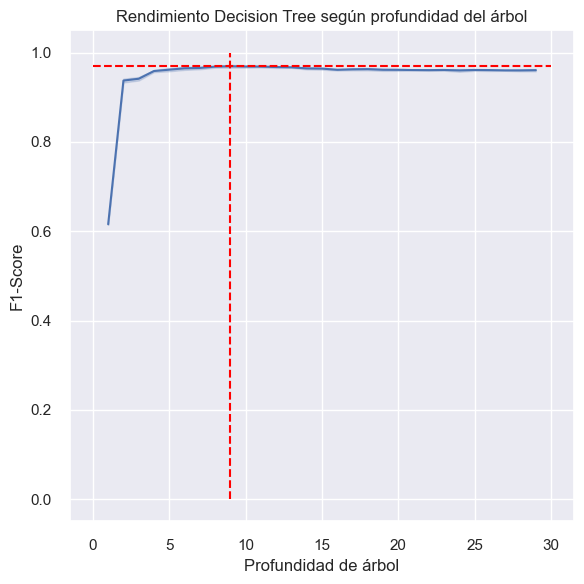

In [124]:
f, ax = plt.subplots(1,1, figsize=(6, 6))
sns.lineplot(data=df_results, x="depth", y="value", errorbar="sd", ax=ax)
ax.plot([9, 9], [0., 1], color="red", linestyle="--")
ax.plot([0, 30], [0.971, 0.971], color="red", linestyle="--")

plt.title("Rendimiento Decision Tree según profundidad del árbol")
ax.set_xlabel("Profundidad de árbol")
ax.set_ylabel("F1-Score")
plt.tight_layout()

In [125]:
# Creamos el arbol
classification = DecisionTreeClassifier(criterion='entropy', max_depth=9, random_state=42)
# Y entrenamos
classification.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=42, splitter='best')

In [126]:
y_pred = classification.predict(X_test)

f1 = f1_score(y_test, y_pred, average='macro')

print(f"F1-score de testeo fue: {f1}")

F1-score de testeo fue: 0.9705010732562704


In [127]:
export_graphviz(classification, out_file = "arbol_clasificacion_level9.dot",feature_names=NUMERICAL_FEATURES)

In [128]:
# Convertimos el archivo DOT en un archivo PNG.
graph = graphviz.Source.from_file('arbol_clasificacion_level9.dot')
graph.render('arbol_clasificacion_level9', format='png')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.865936 to fit


'arbol_clasificacion_level9.png'

#### Veamos la imágen generada del árbol con mejores hiperparámetros. 
<img src="arbol_clasificacion_level9.png" height="1024px">

<a id="knn"></a>

## 7. Segundo modelo: KNN

<a href="#indice"><span></span><strong>Volver al Índice</strong></a>

In [129]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 42)

In [131]:
from sklearn.neighbors import KNeighborsClassifier

# Creamos el clasificador KNN
clasificacion_knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto')

# Y entrenamos
clasificacion_knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [132]:

y_pred_train = clasificacion_knn.predict(X_train)
y_pred = clasificacion_knn.predict(X_test)

f1_train = f1_score(y_train, y_pred_train, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"F1-score de entrenamiento KNN fue: {f1_train}")
print(f"F1-score de testeo KNN fue: {f1}")

F1-score de entrenamiento KNN fue: 0.9137879590546883
F1-score de testeo KNN fue: 0.8804562659883285


#### Usemos Cross Validation con KNN

In [133]:
# Hagamos Cross-validation para varios número de vecinos
scores_list = []
k_array = np.arange(1, 31)
for index, k in enumerate(k_array):
    clasificacion_knn = KNeighborsClassifier(n_neighbors=k, metric="minkowski", p=2) #, weights='uniform', algorithm='auto')
    # Crear un scorer personalizado
    macro_f1_scorer = make_scorer(f1_score, average='macro')
    scores_list.append(np.abs(cross_val_score(clasificacion_knn, X_train, y_train, cv=10, scoring=macro_f1_scorer, n_jobs=-1)))
    clasificacion_knn.fit(X_train, y_train)

scores_array = np.array(scores_list)
del scores_list

df_results = pd.DataFrame({"k_range": k_array,
                           "f11": scores_array[:, 0],
                           "f12": scores_array[:, 1],
                           "f13": scores_array[:, 2],
                           "f14": scores_array[:, 3],
                           "f15": scores_array[:, 4]})

df_results = pd.melt(df_results, id_vars=['k_range'], value_vars=["f11", "f12", "f13", "f14", "f15"])

In [134]:
df_results

,k_range,variable,value
0,1,f11,0.876289
1,2,f11,0.851215
2,3,f11,0.884252
3,4,f11,0.869307
4,5,f11,0.881614
...,...,...,...
145,26,f15,0.835593
146,27,f15,0.836725
147,28,f15,0.834387
148,29,f15,0.833676


In [135]:
# Encontrar el índice de la fila con el valor máximo en la columna 'value'
idx = df_results['value'].idxmax()

# Seleccionar la fila
max_row = df_results.loc[idx]

print(f"El mejor valor de K es {max_row['k_range']} con una precisión promedio de {max_row['value']}")

El mejor valor de K es 3 con una precisión promedio de 0.8912427370457471


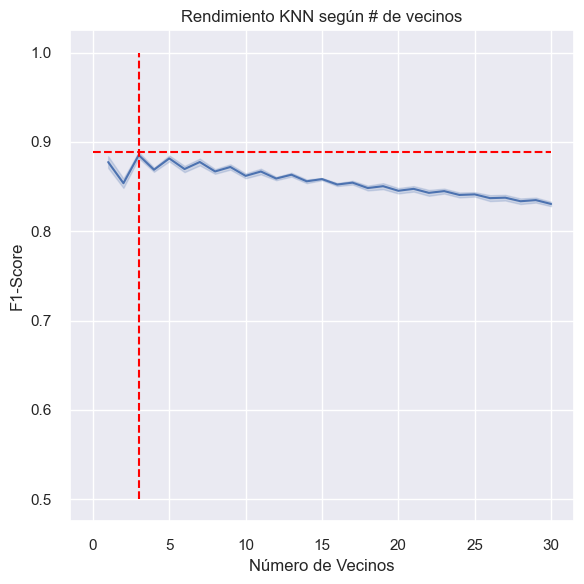

In [136]:
# Tomando el mejor valor de K, y el promedio de los 10 folds graficamos

f, ax = plt.subplots(1,1, figsize=(6, 6))
sns.lineplot(data=df_results, x="k_range", y="value", errorbar="sd", ax=ax)
ax.plot([3, 3], [0.5, 1], color="red", linestyle="--")
ax.plot([0, 30], [0.889, 0.889], color="red", linestyle="--")

plt.title("Rendimiento KNN según # de vecinos")
ax.set_xlabel("Número de Vecinos")
ax.set_ylabel("F1-Score")
plt.tight_layout()

<a id="rf"></a>

## 8. Tercer modelo: Random Forest

<a href="#indice"><span></span><strong>Volver al Índice</strong></a>

In [137]:
# como siempre vamos separando nuestras variables predictoras de la variable a predecir
X = df_label_encoder.loc[:,NUMERICAL_FEATURES].values
y = df_label_encoder.loc[:,LABEL].values



In [138]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [139]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score
from sklearn.metrics import f1_score

from sklearn.ensemble import RandomForestClassifier

In [140]:
scores_list = []
depth_array = np.arange(1, 30)
estimators_array = [10, 50, 100, 200]  # Ejemplo de diferentes números de árboles
results = []

for depth in depth_array:
    for n_estimators in estimators_array:
        clf = RandomForestClassifier(n_estimators=n_estimators, criterion='entropy', max_depth=depth, random_state=42, n_jobs=-1)

        # Crear un scorer personalizado
        macro_f1_scorer = make_scorer(f1_score, average='macro')

        # Calcular los scores usando cross-validation
        scores = cross_val_score(clf, X_train, y_train, cv=10, scoring=macro_f1_scorer, n_jobs=-1)
        scores_mean = np.abs(scores).mean()

        # Guardar los resultados
        results.append({'depth': depth, 'n_estimators': n_estimators, 'score': scores_mean})

# Convertir los resultados en un DataFrame
df_results = pd.DataFrame(results)

# Si deseas ver los resultados ordenados por score
df_results_sorted = df_results.sort_values(by='score', ascending=False)

In [141]:
df_results_sorted

,depth,n_estimators,score
74,19,100,0.975059
75,19,200,0.975038
98,25,100,0.975028
94,24,100,0.974982
110,28,100,0.974905
...,...,...,...
4,2,10,0.624067
0,1,10,0.615476
2,1,100,0.332398
3,1,200,0.322135


Mejores parametros:
- n_estimators = 100
- depth = 19

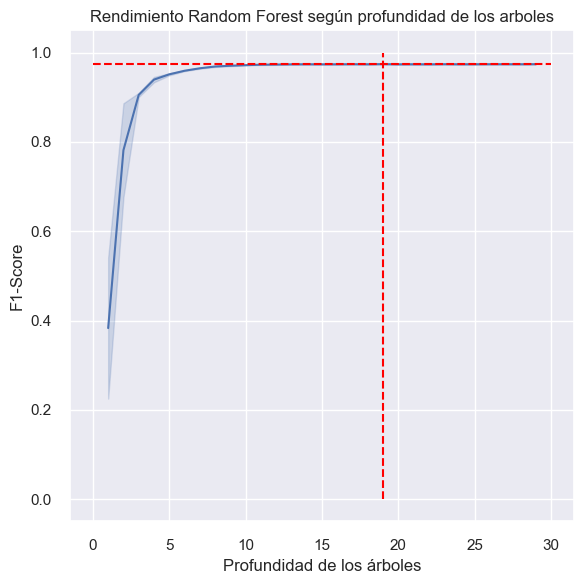

In [142]:
f, ax = plt.subplots(1,1, figsize=(6, 6))
sns.lineplot(data=df_results, x="depth", y="score", errorbar="sd", ax=ax)
ax.plot([19, 19], [0., 1], color="red", linestyle="--")
ax.plot([0, 30], [0.975, 0.975], color="red", linestyle="--")

plt.title("Rendimiento Random Forest según profundidad de los arboles")
ax.set_xlabel("Profundidad de los árboles")
ax.set_ylabel("F1-Score")
plt.tight_layout()

In [143]:
rf = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=19, random_state=42, n_jobs=-1)

In [144]:
# Entrenar el modelo usando el conjunto de entranamiento
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=19, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)

In [145]:
y_pred_train = rf.predict(X_train)
y_pred = rf.predict(X_test)

f1_train = f1_score(y_train, y_pred_train, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"F1-score de entrenamiento de RF fue: {f1_train}")
print(f"F1-score de testeo de RF fue: {f1}")

F1-score de entrenamiento de RF fue: 0.9976882156950735
F1-score de testeo de RF fue: 0.9746865792124803


<a id="qda"></a>

## 9. Cuarto modelo: QDA

<a href="#indice"><span></span><strong>Volver al Índice</strong></a>

In [173]:
#TODO [QDA] Falta impelemntar QDA comun y con Cross Validation

<a id="lda"></a>

## 10. Quinto modelo: LDA

<a href="#indice"><span></span><strong>Volver al Índice</strong></a>

In [172]:
#TODO [LDA] Falta impelemntar LDA comun y con Cross Validation

<a id="lr"></a>

## 11. Sexto modelo: Regrersión Lineal

<a href="#indice"><span></span><strong>Volver al Índice</strong></a>

In [164]:
#TODO [RL] Falta impelemntar Regresión Lineal comun y con Cross Validation

<a id="conclusion"></a>

## 12. Conclusión

<a href="#indice"><span></span><strong>Volver al Índice</strong></a>

In [158]:
#TODO [Conclusión] Falta la conclusión